In [1]:
### Sephora price prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/sephora_website_dataset.csv')

In [4]:
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [5]:
# to check for missing values, no missing values
df.isnull().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [6]:
# to check for any duplicated values
duplicates = df[df.duplicated()]

In [7]:
# there are no duplicated values
duplicates

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer


In [8]:
# to check if the variables are in their correct variable types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [9]:
# to see categorical variables only
df.select_dtypes('object')

,brand,category,name,size,URL,MarketingFlags_content,options,details,how_to_use,ingredients
0,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,https://www.sephora.com/product/blu-mediterran...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...
1,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,https://www.sephora.com/product/colonia-P16360...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown
2,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,https://www.sephora.com/product/blu-mediterran...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...
3,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,https://www.sephora.com/product/blu-mediterran...,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown
4,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,https://www.sephora.com/product/colonia-miniat...,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...
...,...,...,...,...,...,...,...,...,...,...
9163,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,https://www.sephora.com/product/the-rose-gold-...,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...
9164,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,https://www.sephora.com/product/sephora-collec...,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...
9165,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,https://www.sephora.com/product/sephora-collec...,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...
9166,SEPHORA COLLECTION,no category,Gift Card,no size,https://www.sephora.com/product/gift-card-P370...,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown


In [10]:
# to see numeric variables only
df.select_dtypes(['int','float'])

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,4.0,4,3002,66.0,75.0,1,0,0,0
1,2044816,4.5,76,2700,66.0,66.0,1,0,0,0
2,1417567,4.5,26,2600,180.0,180.0,1,0,0,0
3,1417617,4.5,23,2900,120.0,120.0,1,0,0,0
4,2218766,3.5,2,943,72.0,80.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9163,2208502,2.0,15,6200,6.0,6.0,0,1,1,0
9164,2298909,0.0,0,266,15.0,27.0,0,1,0,0
9165,2236750,0.0,0,445,16.0,16.0,0,1,0,0
9166,50,5.0,46,0,50.0,50.0,0,0,0,0


In [11]:
# to remove 'id' columns as not useful for analysis
df = df.drop('id', axis=1)

In [12]:
# to observe all correlations of numeric variables only
df.select_dtypes(['int','float']).corr()

,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
rating,1.000000,0.081478,0.094788,0.019559,0.001941,-0.123342,-0.001908,-0.130471,0.006164
number_of_reviews,0.081478,1.000000,0.746099,-0.084001,-0.088855,-0.137082,0.003799,-0.066661,0.000742
love,0.094788,0.746099,1.000000,-0.088724,-0.091140,-0.138933,0.050957,-0.046750,-0.002879
price,0.019559,-0.084001,-0.088724,1.000000,0.983357,0.117250,-0.178809,0.015333,-0.009679
value_price,0.001941,-0.088855,-0.091140,0.983357,1.000000,0.130658,-0.159005,0.079754,-0.009874
online_only,-0.123342,-0.137082,-0.138933,0.117250,0.130658,1.000000,-0.077543,0.097353,-0.010023
exclusive,-0.001908,0.003799,0.050957,-0.178809,-0.159005,-0.077543,1.000000,0.166162,0.002814
limited_edition,-0.130471,-0.066661,-0.046750,0.015333,0.079754,0.097353,0.166162,1.000000,0.015129
limited_time_offer,0.006164,0.000742,-0.002879,-0.009679,-0.009874,-0.010023,0.002814,0.015129,1.000000


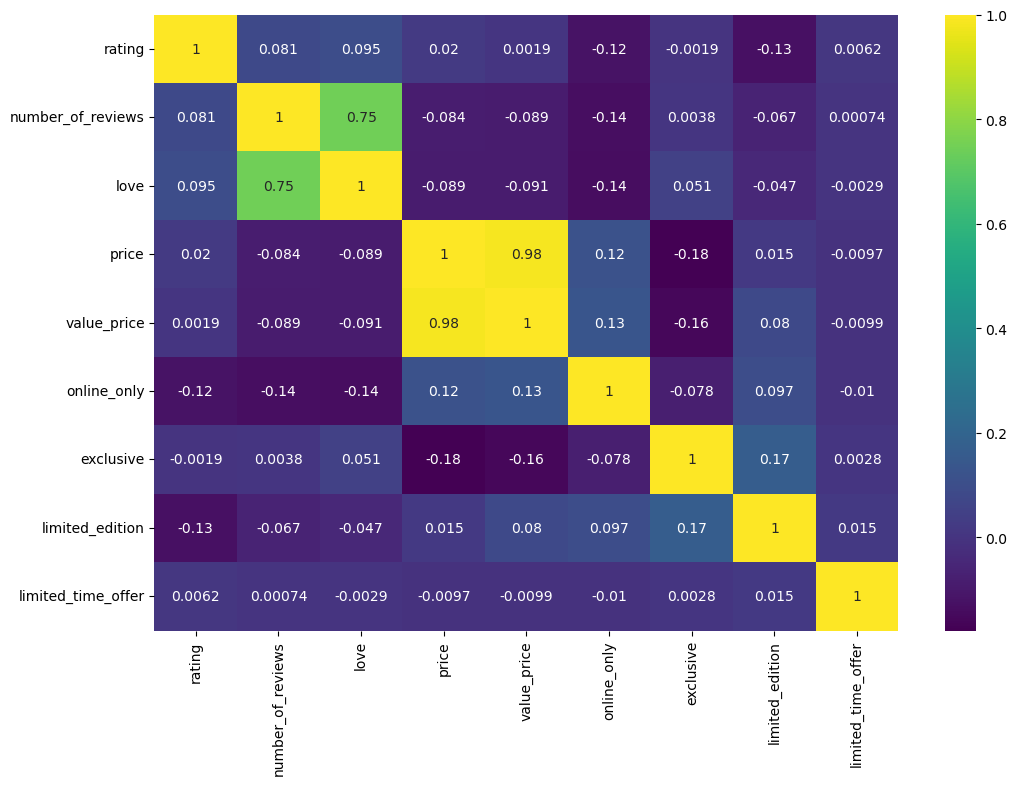

In [13]:
# to visualise correlation in the form of heatmap
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(df.select_dtypes(['int','float']).corr(), cmap='viridis', annot=True);

In [14]:
# to see correlation against the 'value_price' column
# aside from value_price, 'online_only','limited_edition','rating' has high correlation against Discounted price: 'Value Price'
df.select_dtypes(['int','float']).corr()['value_price'].sort_values(ascending=False)

value_price           1.000000
price                 0.983357
online_only           0.130658
limited_edition       0.079754
rating                0.001941
limited_time_offer   -0.009874
number_of_reviews    -0.088855
love                 -0.091140
exclusive            -0.159005
Name: value_price, dtype: float64

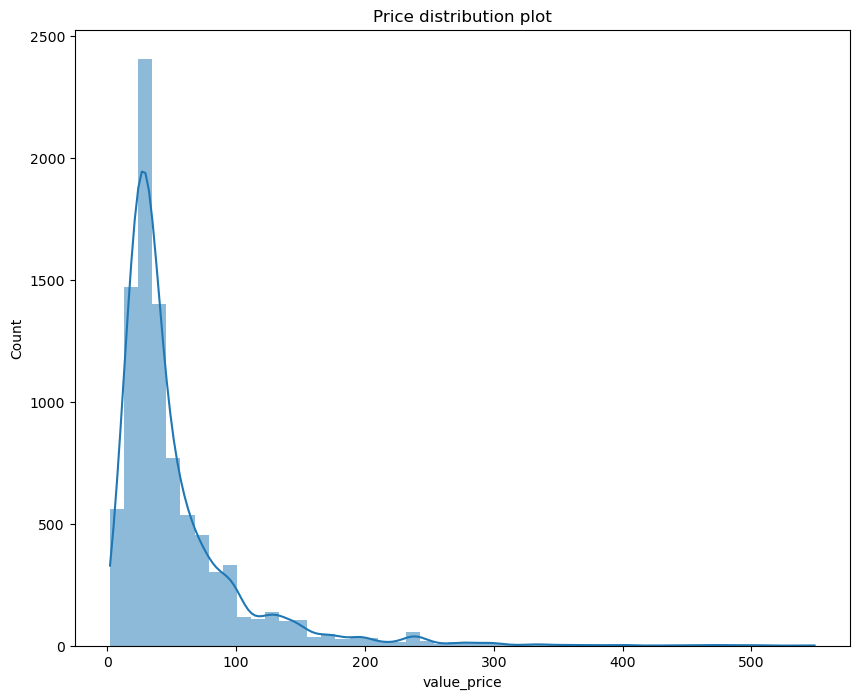

In [15]:
# to plot the distribution of 'value_price'
plt.figure(figsize=(10,8),dpi=100)
sns.histplot(data=df, x='value_price', edgecolor=None, kde=True, bins=50)
plt.title('Price distribution plot');

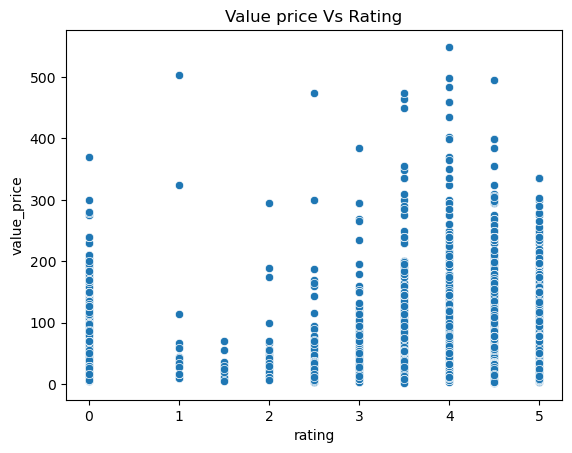

In [16]:
# scatterplot of value price vs rating
sns.scatterplot(data=df, y='value_price', x='rating')
plt.title('Value price Vs Rating');

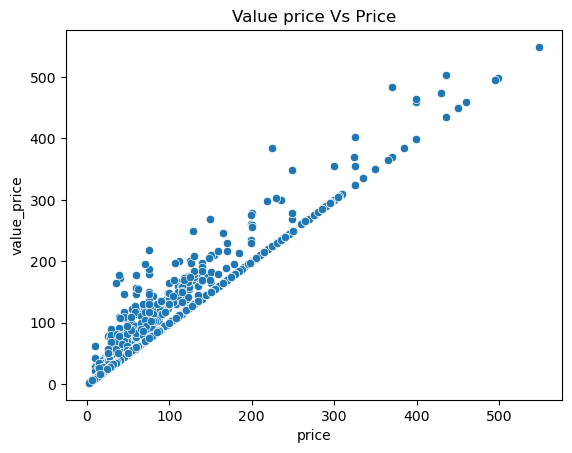

In [17]:
# price and value price has very high correlation to each other
sns.scatterplot(data=df, y='value_price', x='price')
plt.title('Value price Vs Price');

In [18]:
df.select_dtypes('object').head()

,brand,category,name,size,URL,MarketingFlags_content,options,details,how_to_use,ingredients
0,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,https://www.sephora.com/product/blu-mediterran...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...
1,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,https://www.sephora.com/product/colonia-P16360...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown
2,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,https://www.sephora.com/product/blu-mediterran...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...
3,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,https://www.sephora.com/product/blu-mediterran...,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown
4,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,https://www.sephora.com/product/colonia-miniat...,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...


In [19]:
# to see which category has the highest average rating 
Brands = pd.DataFrame(df.groupby('brand')['rating'].mean())
Ratings = Brands.sort_values('rating', ascending=False)

In [20]:
# to print top 10 brands with the highest rating
Ratings.head(10)

,rating
brand,
Montblanc,5.000000
Aether Beauty,5.000000
Four Sigmatic,5.000000
Fable & Mane,5.000000
Golde,4.875000
RODIN olio lusso,4.812500
The Art of Shaving,4.700000
SOBEL SKIN Rx,4.687500
Paco Rabanne,4.687500


In [21]:
# to see the popularity of the brand by their sum of ratings
popular = pd.DataFrame(df.groupby('brand')['rating'].sum())
popularity = popular.sort_values('rating', ascending=False)

In [22]:
popularity.head(10)

,rating
brand,
SEPHORA COLLECTION,1910.5
CLINIQUE,919.0
tarte,681.0
TOM FORD,636.5
Dior,579.0
Fresh,576.0
Kiehl's Since 1851,510.0
Lancôme,491.0
MAKE UP FOR EVER,420.0


In [23]:
# to see which brand has the most number of reviews by customers
brand_review = pd.DataFrame(df.groupby('brand')['number_of_reviews'].sum())
most_reviewed = brand_review.sort_values('number_of_reviews', ascending=False)

In [24]:
most_reviewed.head(10)

,number_of_reviews
brand,
SEPHORA COLLECTION,121095
Too Faced,88405
Urban Decay,87273
Benefit Cosmetics,87237
KVD Vegan Beauty,86103
CLINIQUE,85435
tarte,80230
Anastasia Beverly Hills,77497
NARS,68949


In [25]:
# to see which is the most popular category in Sephora
rating_cat = pd.DataFrame(df.groupby('category')['rating'].mean())
highrating_cat = rating_cat.sort_values('rating', ascending=False)

In [26]:
highrating_cat.head(10)

,rating
category,
Lid Shadow Brush,5.000000
Cologne,4.553797
Aftershave,4.538462
High Tech Tools,4.500000
Powder Brush,4.500000
Wellness,4.500000
Lip Treatments,4.500000
Body Moisturizers,4.500000
Spa Tools,4.500000


In [27]:
# to see which categories in sephora has the highest average price
price_cat = pd.DataFrame(df.groupby('category')['price'].mean())
high_price = price_cat.sort_values('price', ascending=False)

In [28]:
# to print top 10 categories with the highest average price
high_price.head(10)

,price
category,
Hair Straighteners & Flat Irons,187.310345
Hair Dryers,174.461538
Curling Irons,146.454545
Anti-Aging,131.297297
High Tech Tools,129.000000
Hair Thinning & Hair Loss,120.000000
Perfume,112.156391
Cologne Gift Sets,108.416667
Facial Cleansing Brushes,107.613636


In [29]:
# to see which brands have recieved alot of love from customer
brand_love = pd.DataFrame(df.groupby('brand')['love'].mean())
most_love = brand_love.sort_values('love', ascending=False)

In [30]:
# to print the top 10 brans that received the most love from customer
most_love.head(10)

,love
brand,
stila,140942.857143
Buxom,123616.666667
Anastasia Beverly Hills,85580.000000
NARS,84117.543860
Olaplex,73700.000000
FENTY BEAUTY by Rihanna,66043.647059
HUDA BEAUTY,63887.037037
Urban Decay,63784.828947
Drunk Elephant,61496.875000


In [21]:
# to see products that have 0 rating
pd.DataFrame(df[df['rating'] == 0])

,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
14,Acqua Di Parma,Perfume,Camelia Eau de Parfum,3.4 oz/ 100 mL,0.0,0,143,275.0,275.0,https://www.sephora.com/product/acqua-di-parma...,True,online only,- 0.68 oz/ 20 mL Eau de Parfum Spray - 3.4 oz...,Fragrance Family: FloralsScent Type: Fresh Flo...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,0,0
26,Acqua Di Parma,Cologne,Colonia Club,1.7 oz/ 50 mL,0.0,0,259,120.0,120.0,https://www.sephora.com/product/colonia-club-P...,True,online only,- 1.7 oz/ 50 mL Eau de Cologne Spray,Colonia Club captures bold masculinity and a m...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
31,Acqua Di Parma,Perfume Gift Sets,Blu Mediterraneo Arancia di Capri Gift Set,no size,0.0,0,204,113.0,143.0,https://www.sephora.com/product/blu-mediterran...,True,limited edition · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,1,0
32,Acqua Di Parma,Perfume Gift Sets,Rosa Nobile Gift Set,no size,0.0,0,235,200.0,279.0,https://www.sephora.com/product/rosa-nobile-gi...,True,limited edition · online only,no options,Fragrance Family: Floral\n\nScent Type: Classi...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,1,0
33,Acqua Di Parma,Perfume,Sakura Eau de Parfum,3.4 oz/ 100 mL,0.0,0,165,275.0,275.0,https://www.sephora.com/product/acqua-di-parma...,True,online only,- 0.7 oz/ 20 mL Eau de Parfum Spray - 3.4 oz/...,Fragrance Family: FloralsScent Type: Fruity Fl...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Aqua (Water)- Parfum (Fragranc...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9105,SEPHORA COLLECTION,Eye Brushes,PRO Shadow Brush #13,no size,0.0,0,400,20.0,20.0,https://www.sephora.com/product/sephora-collec...,True,exclusive,no options,What it is: A flat- slightly tapered-shape bru...,Suggested Usage:-Load brush head with product ...,unknown,0,1,0,0
9108,SEPHORA COLLECTION,Beauty Supplements,Sephora Collection x OLLY: Mini Glowing Skin,10 Count,0.0,0,692,7.0,7.0,https://www.sephora.com/product/sephora-collec...,True,exclusive,no options,Beauty Benefit: For Hydrated- Youthful Skin Wh...,Suggested Usage:-For best results- chew two gu...,-Hyaluronic Acid: Helps plump- smooth- and mo...,0,1,0,0
9164,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,https://www.sephora.com/product/sephora-collec...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,https://www.sephora.com/product/sephora-collec...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0


In [22]:
# to check total number items with 0 ratings
len(df[df['rating'] == 0])

398

In [23]:
# to create a new dataframe where products with 0 ratings are being removed, as it is not useful for analysis
sep = df[df['rating'] > 0]
sep

,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,https://www.sephora.com/product/colonia-miniat...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,SEPHORA COLLECTION,Bath Soaks & Bubble Bath,Fizzing Bath Star Mini - Surprise Flowers,0.53oz/15g,3.5,11,2100,2.0,2.0,https://www.sephora.com/product/fizzing-bath-s...,True,exclusive · online only,no options,What it is: A fizzing star that dissolves int...,Suggested Usage:-Place the fizzing star in the...,Sodium Bicarbonate- Citric Acid- CI 77891 (Tit...,1,1,0,0
9161,SEPHORA COLLECTION,Brush Sets,Face the Day: Full Face Brush Set,no size,3.5,62,32900,49.0,95.0,https://www.sephora.com/product/face-day-full-...,True,limited edition · exclusive,no options,What it is:\nA six-piece brush set designed to...,no instructions,unknown,0,1,1,0
9162,SEPHORA COLLECTION,Scrub & Exfoliants,Exfoliating Body Granita Scrub - Surprise Flowers,8.45oz/250mL,3.5,39,6900,8.0,8.0,https://www.sephora.com/product/exfoliating-bo...,True,exclusive · online only,no options,What it is: An indulgent- yet gentle exfoliat...,Suggested Usage:-Apply to wet skin.-Massage in...,Water- Glycerin- Cellulose Acetate- Sodium Lau...,1,1,0,0
9163,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,https://www.sephora.com/product/the-rose-gold-...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0


In [24]:
# there are 8770 products in sephora that have rating > 1
len(sep)

8770

In [25]:
sep.columns

Index(['brand', 'category', 'name', 'size', 'rating', 'number_of_reviews',
       'love', 'price', 'value_price', 'URL', 'MarketingFlags',
       'MarketingFlags_content', 'options', 'details', 'how_to_use',
       'ingredients', 'online_only', 'exclusive', 'limited_edition',
       'limited_time_offer'],
      dtype='object')

In [26]:
# to remove columns that are not useful for Price prediction analysis
sep = sep.drop(['name','size','URL','MarketingFlags_content','options','details','how_to_use','ingredients','price'], axis=1)

In [27]:
sep.head()

,brand,category,rating,number_of_reviews,love,value_price,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer
0,Acqua Di Parma,Fragrance,4.0,4,3002,75.0,True,1,0,0,0
1,Acqua Di Parma,Cologne,4.5,76,2700,66.0,True,1,0,0,0
2,Acqua Di Parma,Perfume,4.5,26,2600,180.0,True,1,0,0,0
3,Acqua Di Parma,Perfume,4.5,23,2900,120.0,True,1,0,0,0
4,Acqua Di Parma,Fragrance,3.5,2,943,80.0,True,1,0,0,0


In [28]:
sep['MarketingFlags']

0        True
1        True
2        True
3        True
4        True
        ...  
9160     True
9161     True
9162     True
9163     True
9166    False
Name: MarketingFlags, Length: 8770, dtype: bool

In [29]:
# to map 'MarketingFlags' into numeric columns
sep['MarketingFlags'] = sep['MarketingFlags'].map({True:1, False:0})

In [30]:
sep['MarketingFlags']

0       1
1       1
2       1
3       1
4       1
       ..
9160    1
9161    1
9162    1
9163    1
9166    0
Name: MarketingFlags, Length: 8770, dtype: int64

In [31]:
# to check if all variables are in their correct variable types
# only 'brand' & category are categorical variables
sep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8770 entries, 0 to 9166
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               8770 non-null   object 
 1   category            8770 non-null   object 
 2   rating              8770 non-null   float64
 3   number_of_reviews   8770 non-null   int64  
 4   love                8770 non-null   int64  
 5   value_price         8770 non-null   float64
 6   MarketingFlags      8770 non-null   int64  
 7   online_only         8770 non-null   int64  
 8   exclusive           8770 non-null   int64  
 9   limited_edition     8770 non-null   int64  
 10  limited_time_offer  8770 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 822.2+ KB


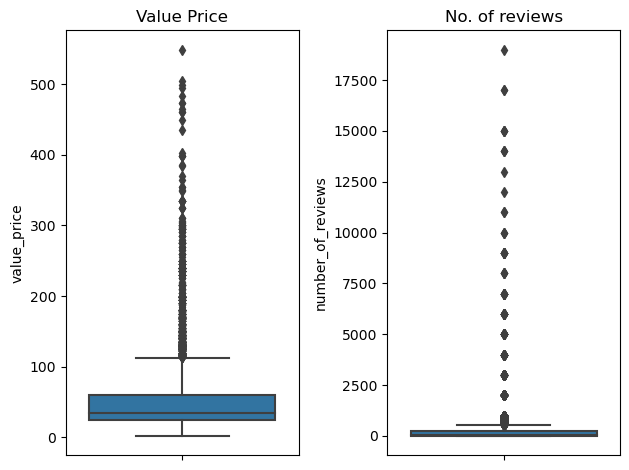

In [37]:
# there are many outlier values in 'price', target variable
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.boxplot(data=sep, y='value_price')
plt.title('Value Price')

plt.subplot(1, 2, 2) # row 1, column 2, count 2
sns.boxplot(data=sep, y='number_of_reviews')
plt.title('No. of reviews')

# space between the plots
plt.tight_layout();

In [43]:
# to remove upper limit outlier values in 'price'
p_Q1_25 = sep['value_price'].quantile(0.25)
p_Q1_25

25.0

In [44]:
p_Q3_75 = sep['value_price'].quantile(0.75)
p_Q3_75

60.0

In [45]:
IQR = p_Q3_75 - p_Q1_25
IQR

35.0

In [46]:
# price upper limits
p_upper_limit = 60 + 1.5 * 35
p_upper_limit

112.5

In [47]:
# Finding the upper limit outliers
p_upper_array = sep[sep['value_price'] > p_upper_limit]

In [48]:
# to remove the outliers in Affluence Grade
sep = sep[(sep['value_price'] < p_upper_limit)]
sep.shape

(8018, 11)

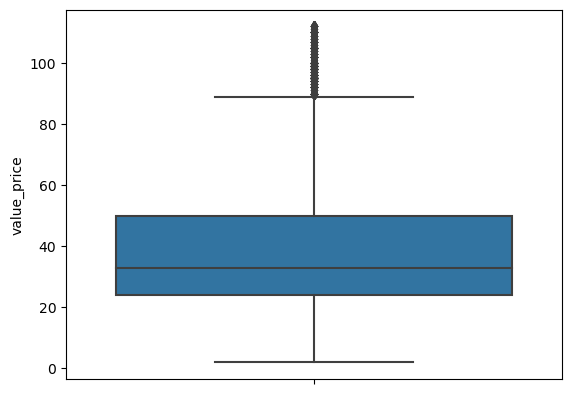

In [49]:
# most of the outlier values in price has been removed
sns.boxplot(data=sep, y='value_price')
plt.show()

In [51]:
R_Q1_25 = df['number_of_reviews'].quantile(0.25)
R_Q1_25

10.0

In [52]:
R_Q3_75 = df['number_of_reviews'].quantile(0.75)
R_Q3_75

210.0

In [53]:
# IQR = Quartile 3(75) - Quartile 1(25) 
IQR = R_Q3_75 - R_Q1_25
IQR

200.0

In [54]:
# 'number of review' upper limit
R_upper_limit = 210 + 1.5 * 200
R_upper_limit

510.0

In [55]:
# Finding the upper limit outliers
R_upper_array = sep[sep['number_of_reviews'] > R_upper_limit]

In [56]:
# to remove the outliers in Affluence Grade
sep = sep[(sep['number_of_reviews'] < R_upper_limit)]
sep.shape

(6815, 11)

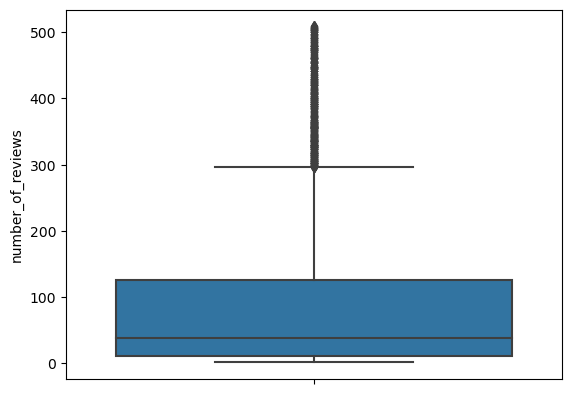

In [57]:
# After removal of outliers for 'number of reviews'
sns.boxplot(data=sep, y='number_of_reviews')
plt.show()

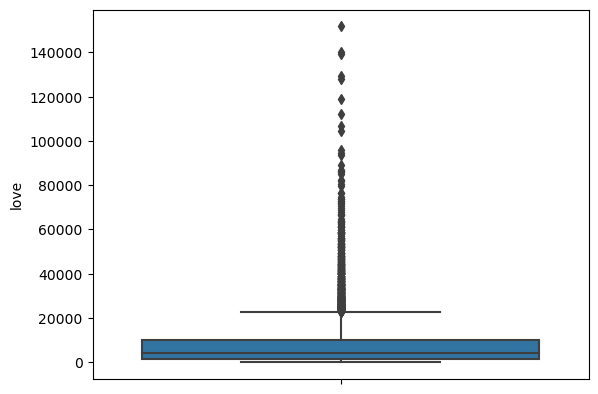

In [58]:
sns.boxplot(data=sep, y='love')
plt.show()

In [59]:
l_Q1_25 = df['love'].quantile(0.25)
l_Q1_25

1600.0

In [60]:
l_Q3_75 = df['love'].quantile(0.75)
l_Q3_75

13800.0

In [61]:
IQR = l_Q3_75 - l_Q1_25
IQR

12200.0

In [62]:
l_upper_limit = 13800 + 1.5 * 12200
l_upper_limit

32100.0

In [63]:
# Finding the upper limit outliers
l_upper_array = sep[sep['love'] > l_upper_limit]

In [64]:
# to remove the outliers in Affluence Grade
sep = sep[(sep['love'] < l_upper_limit)]
sep.shape

(6527, 11)

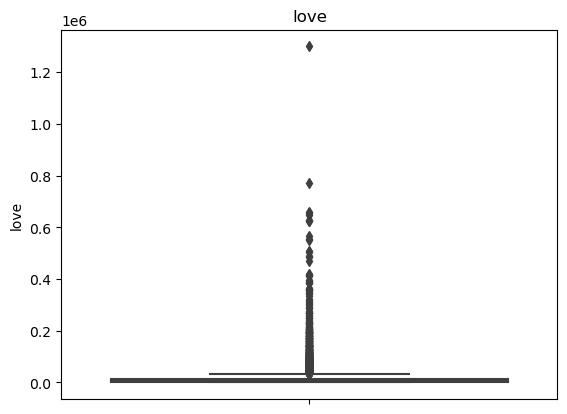

In [38]:
# after outliers removal
sns.boxplot(data=sep, y='love')
plt.title('love');

In [66]:
sep.head()

,brand,category,rating,number_of_reviews,love,value_price,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer
0,Acqua Di Parma,Fragrance,4.0,4,3002,75.0,1,1,0,0,0
1,Acqua Di Parma,Cologne,4.5,76,2700,66.0,1,1,0,0,0
4,Acqua Di Parma,Fragrance,3.5,2,943,80.0,1,1,0,0,0
8,Acqua Di Parma,Body Mist & Hair Mist,4.0,5,800,58.0,1,1,0,0,0
9,Acqua Di Parma,Perfume,3.0,5,2100,58.0,1,1,1,0,0


In [67]:
# to define X and y
X = sep.drop('value_price', axis=1)

In [68]:
# to convert X into dummy variables, drop first= True to remove first column to prevent multi-collinearity issue
X = pd.get_dummies(X, drop_first=True)

In [69]:
# Target variable, to predict the discounted price of sephora products: 'value_price'
y = sep['value_price']

In [70]:
X

,rating,number_of_reviews,love,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer,brand_AERIN,brand_ALTERNA Haircare,...,category_Spa Tools,category_Sponges & Applicators,category_Sunscreen,category_Teeth Whitening,category_Tinted Moisturizer,category_Toners,category_Tweezers & Eyebrow Tools,category_Value & Gift Sets,category_Wellness,category_no category
0,4.0,4,3002,1,1,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.5,76,2700,1,1,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.5,2,943,1,1,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
8,4.0,5,800,1,1,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
9,3.0,5,2100,1,1,1,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9159,4.0,32,4800,1,1,1,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
9160,3.5,11,2100,1,1,1,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
9162,3.5,39,6900,1,1,1,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
9163,2.0,15,6200,1,0,1,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
# testing data = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [74]:
scaler = StandardScaler()

In [75]:
scaled_X_train = scaler.fit_transform(X_train)

In [76]:
scaled_X_test = scaler.transform(X_test)

In [77]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [78]:
# to build the random forest model
rf = RandomForestRegressor()

In [79]:
# to fit the RF regressor to the training data
rf.fit(scaled_X_train,y_train)

RandomForestRegressor()

In [80]:
# to do predictions on the testing data
rf_pred = rf.predict(scaled_X_test)

In [81]:
# to print first 10 predictions of the random forest model
rf_pred[:10]

array([43.25  , 18.98  , 17.82  , 43.05  , 52.74  , 44.9199, 45.155 ,
       38.49  , 85.66  , 17.67  ])

In [82]:
#from sklearn.metrics import r2_score

In [83]:
#testing_score = []

In [84]:
#a = r2_score(y_test,rf_pred)*100
#testing_score.append(a)
    
#print(f"r2_Score of {rf} model on Testing Data is:",a)

In [85]:
rf_errors = abs(rf_pred - y_test)

In [86]:
# Calculate mean absolute percentage error (MAPE), determine performance metrics
rf_mape = 100 * (rf_errors / y_test)

In [87]:
# Calculate and display accuracy
# the accuracy rate of Random Forest regressor model = 69.73%
accuracy = 100 - np.mean(rf_mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 69.73 %.


In [88]:
from xgboost import XGBRegressor

In [89]:
xg = XGBRegressor()

In [90]:
# to fit the xgboot model to the training data
xg.fit(scaled_X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [91]:
# to do predictions on the x testing data
xg_pred = xg.predict(scaled_X_test)

In [92]:
# to print first 10 price predictions
xg_pred [:10]

array([33.668713, 25.585897, 12.962975, 40.69715 , 44.25124 , 41.038868,
       45.84899 , 34.43943 , 81.616974, 19.204353], dtype=float32)

In [93]:
xg_errors = abs(xg_pred - y_test)

In [94]:
xg_mape = 100*(rf_errors / y_test)

In [95]:
# Calculate and display accuracy
# the accuracy rate of the XGBoost regressor model = 69.73%
accuracy = 100 - np.mean(xg_mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 69.73 %.


In [96]:
# to build the AdaBoost regressor model
ada = AdaBoostRegressor()

In [97]:
ada.fit(scaled_X_train,y_train)

AdaBoostRegressor()

In [98]:
# to do prediction on the X test dat
ada_pred = ada.predict(scaled_X_test)

In [99]:
ada_pred[:10]

array([40.05978922, 40.05978922, 40.05978922, 40.05978922, 40.05978922,
       40.05978922, 40.05978922, 40.05978922, 83.18918919, 40.05978922])

In [100]:
ada_errors = abs(ada_pred - y_test)

In [101]:
ada_mape = 100* (ada_errors / y_test)

In [102]:
# Calculate and display accuracy
# the accuracy rate of AdaBoost regressor model = 27.62%
accuracy = 100 - np.mean(ada_mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 27.62 %.


In [103]:
gb = GradientBoostingRegressor()

In [104]:
# to fit the Gradient Boost regressor on the training model
gb.fit(scaled_X_train,y_train)

GradientBoostingRegressor()

In [105]:
# to do prediction on the x test data
gb_pred = gb.predict(scaled_X_test)

In [106]:
gb_pred[:10]

array([32.42614514, 33.62017537, 21.40735343, 37.55450491, 50.8588069 ,
       44.05838513, 36.46715283, 36.67508605, 75.96016128, 27.75336886])

In [107]:
# to evaluate the performance metrics
gb_errors = abs(gb_pred - y_test)

In [108]:
# Calculate mean absolute percentage error (MAPE), determine performance metrics
gb_mape = 100 * (gb_errors / y_test)

In [109]:
# Calculate and display accuracy
# the accuracy rate of Gradient Boost regressor model = 51.22%
accuracy = 100 - np.mean(gb_mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 51.21 %.


In [110]:
# the Random Forest regressor has an accuracy rate of 69.6%
rf.feature_importances_

array([2.35649590e-02, 6.64311161e-02, 7.22315791e-02, 7.38292483e-03,
       7.99976397e-03, 9.96133756e-03, 7.25190010e-03, 7.28461533e-06,
       5.58227582e-04, 7.40896129e-04, 4.00856884e-03, 1.47106529e-03,
       1.28691594e-04, 4.01406309e-03, 7.05681829e-04, 5.34602234e-04,
       1.18683677e-04, 8.71555384e-05, 4.00402457e-05, 1.36771263e-03,
       1.82075969e-03, 4.36693127e-05, 9.11689277e-04, 1.49639532e-05,
       1.14826409e-04, 6.87780337e-04, 3.68760606e-04, 2.70196291e-04,
       6.27949956e-04, 1.48178707e-03, 1.08657042e-04, 4.15574310e-06,
       1.05885002e-04, 2.22805183e-05, 1.36844063e-05, 0.00000000e+00,
       1.50732928e-03, 1.67233657e-04, 5.09127251e-04, 1.22808416e-03,
       0.00000000e+00, 3.21412347e-03, 1.11127808e-03, 4.31552217e-03,
       5.78672710e-04, 1.74952071e-05, 1.04272926e-03, 5.58479047e-05,
       1.05900967e-04, 1.59924939e-03, 4.26775264e-05, 1.27051309e-03,
       4.37896908e-05, 1.87437483e-03, 2.77324058e-03, 1.87132184e-04,
      

In [111]:
 rf_imp = pd.DataFrame(index= X.columns, data = rf.feature_importances_, columns=['Importance'])

In [112]:
 rf_imp = rf_imp.sort_values('Importance', ascending=False)

In [113]:
# Top predictors of discounted price or 'value_price' are 'category_Perfume','love','number_of_reviews'
rf_imp[rf_imp['Importance'] > 0.01]

,Importance
category_Perfume,0.150116
love,0.072232
number_of_reviews,0.066431
category_Cologne,0.065014
brand_SEPHORA COLLECTION,0.036334
category_Face Serums,0.032865
category_Moisturizers,0.026291
rating,0.023565
category_Eye Creams & Treatments,0.018433
brand_TOM FORD,0.017725
